In [21]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
import openpyxl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
rh=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\relative_humidity.csv")

In [23]:
rh

,Year,Month,past,pasttopast,relative_humidity
0,1990,1,71.938125,75.810625,73.006250
1,1990,2,63.646250,71.013125,69.791875
2,1990,3,63.166250,64.739375,65.690625
3,1990,4,61.740000,67.438750,61.961875
4,1990,5,61.701250,66.396875,66.535625
...,...,...,...,...,...
355,2019,8,64.994375,74.125625,70.258125
356,2019,9,69.993750,79.676250,78.644375
357,2019,10,79.470625,79.689375,84.020625
358,2019,11,82.379375,86.324375,84.815625


In [24]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               360 non-null    int64  
 1   Month              360 non-null    int64  
 2   past               360 non-null    float64
 3   pasttopast         360 non-null    float64
 4   relative_humidity  360 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 14.2 KB


In [25]:
#Creating correlation for precipitation
#Creating the correlation matrix for the features
corr_matrix=rh.corr()
corr_matrix

,Year,Month,past,pasttopast,relative_humidity
Year,1.000000e+00,2.844429e-15,0.041813,0.042921,0.014037
Month,2.844429e-15,1.000000e+00,0.522561,0.524693,0.525278
past,4.181279e-02,5.225614e-01,1.000000,0.737550,0.741914
pasttopast,4.292053e-02,5.246934e-01,0.737550,1.000000,0.727862
relative_humidity,1.403664e-02,5.252780e-01,0.741914,0.727862,1.000000


In [26]:
mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

c:\Users\C KIRANMAYI\anaconda3\envs\myenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


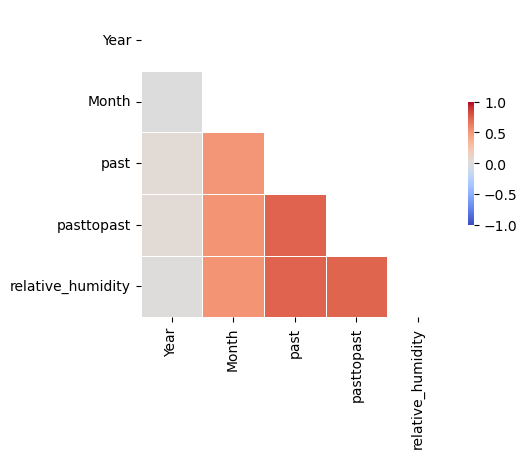

In [27]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [28]:
rh=rh.drop(['Year','Month'],axis=1)

In [29]:
rh.shape

(360, 3)

In [30]:
X=rh.drop('relative_humidity',axis=1)
y=rh.relative_humidity

In [31]:
X

,past,pasttopast
0,71.938125,75.810625
1,63.646250,71.013125
2,63.166250,64.739375
3,61.740000,67.438750
4,61.701250,66.396875
...,...,...
355,64.994375,74.125625
356,69.993750,79.676250
357,79.470625,79.689375
358,82.379375,86.324375


In [32]:
y

0      73.006250
1      69.791875
2      65.690625
3      61.961875
4      66.535625
         ...    
355    70.258125
356    78.644375
357    84.020625
358    84.815625
359    84.138125
Name: relative_humidity, Length: 360, dtype: float64

In [33]:
X.shape

(360, 2)

In [34]:
y.shape

(360,)

In [35]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping data for LSTM/GRU/RNN (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# GRU

In [36]:
def create_gru_model(units=64):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [37]:
gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_7056\2098133132.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gru_model = KerasRegressor(build_fn=create_gru_model, verbose=0)


In [38]:
# Define the hyperparameter grid
gru_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [39]:
gru_grid = GridSearchCV(estimator=gru_model, param_grid=gru_param_grid, cv=3, scoring='neg_mean_squared_error')

In [40]:
gru_grid_result = gru_grid.fit(X_train, y_train)

In [41]:
print(f"Best GRU params: {gru_grid_result.best_params_}")
print(f"Best GRU score: {gru_grid_result.best_score_}")

Best GRU params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best GRU score: -38.953743493799664


# LSTM

In [42]:
def create_lstm_model(units=64):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [43]:
lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_7056\1916978622.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


In [44]:
# Define the hyperparameter grid
lstm_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [45]:
lstm_grid = GridSearchCV(estimator=lstm_model, param_grid=lstm_param_grid, cv=3, scoring='neg_mean_squared_error')

In [46]:
lstm_grid_result = lstm_grid.fit(X_train, y_train)

In [47]:
print(f"Best LSTM params: {lstm_grid_result.best_params_}")
print(f"Best LSTM score: {lstm_grid_result.best_score_}")

Best LSTM params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best LSTM score: -34.80538897563992


# RNN

In [48]:
def create_rnn_model(units=64):
    model = Sequential()
    model.add(SimpleRNN(units=units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

In [49]:
rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)

C:\Users\C KIRANMAYI\AppData\Local\Temp\ipykernel_7056\361697586.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_model = KerasRegressor(build_fn=create_rnn_model, verbose=0)


In [50]:
rnn_param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [51]:
rnn_grid = GridSearchCV(estimator=rnn_model, param_grid=rnn_param_grid, cv=3, scoring='neg_mean_squared_error')

In [52]:
rnn_grid_result = rnn_grid.fit(X_train, y_train)

In [53]:
print(f"Best SimpleRNN params: {rnn_grid_result.best_params_}")
print(f"Best SimpleRNN score: {rnn_grid_result.best_score_}")

Best SimpleRNN params: {'batch_size': 16, 'epochs': 100, 'units': 128}
Best SimpleRNN score: -37.864840017983866


In [54]:
# Evaluating GRU model on test data
best_gru_model = gru_grid_result.best_estimator_
y_pred_gru = best_gru_model.predict(X_test)
mse_gru = mean_squared_error(y_test, y_pred_gru)


print(f"GRU Model - MSE: {mse_gru}")

# Evaluating LSTM model on test data
best_lstm_model = lstm_grid_result.best_estimator_
y_pred_lstm = best_lstm_model.predict(X_test)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)


print(f"LSTM Model - MSE: {mse_lstm}")

# Evaluating SimpleRNN model on test data
best_rnn_model = rnn_grid_result.best_estimator_
y_pred_rnn = best_rnn_model.predict(X_test)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)


print(f"SimpleRNN Model - MSE: {mse_rnn}")


GRU Model - MSE: 15.505522984928328
LSTM Model - MSE: 18.43757611745841
SimpleRNN Model - MSE: 17.006048692781533


## GRU is sutaible for Relative Humidity with least MSE

In [55]:
rh2021=pd.read_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\relative_humidity.csv")

In [56]:
rh2021=rh2021.drop(['Year','Month'],axis=1)

In [57]:
rh2021

,past,pasttopast
0,73.281250,76.573750
1,70.234375,73.504375
2,64.145000,68.953750
3,62.712500,67.734375
4,65.022500,71.792500
5,64.173125,67.878750
6,66.040000,67.497500
7,70.258125,64.994375
8,78.644375,69.993750
9,84.020625,79.470625


In [58]:
rh2020_pred=[]

In [59]:
rh2021_scaled = scaler.transform(rh2021)

# Reshape for prediction
rh2021_scaled = np.reshape(rh2021_scaled, (rh2021_scaled.shape[0], rh2021_scaled.shape[1], 1))

In [60]:
best_model = gru_grid_result.best_estimator_

rh2020_pred1=best_model.predict(rh2021_scaled)

In [61]:
rh2020_pred1

array([74.45552 , 72.31433 , 66.22125 , 64.308136, 67.610825, 66.07901 ,
       68.02141 , 71.391754, 76.36203 , 78.30801 , 78.560036, 78.40571 ],
      dtype=float32)

In [1]:
rhum_data=pd.DataFrame(data=rh2020_pred1)
rhum_data

,0
0,76.455520
1,72.314330
2,66.221250
3,64.308136
4,65.610825
5,66.079010
6,74.021410
7,73.391754
8,76.362030
9,78.308010


In [63]:
rhum_data.to_csv("C:\\Users\\C KIRANMAYI\\Downloads\\2020Yield\\Phase 1\\csv\\2020\\relative_humidity1.csv")